# Neural Network / Titanic

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic-clean-2.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [3]:
df.shape

(881, 7)

In [4]:
pd.get_dummies(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,False,False,True
1,1,1,0,38.0,1,0,True,False,False
2,1,3,0,26.0,0,0,False,False,True
3,1,1,0,35.0,1,0,False,False,True
4,0,3,1,35.0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...
876,0,2,1,27.0,0,0,False,False,True
877,1,1,0,19.0,0,0,False,False,True
878,0,3,0,19.0,1,2,False,False,True
879,1,1,1,26.0,0,0,True,False,False


In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
matrix = encoder.fit_transform(df[["Embarked"]])
encoder_feature_names = encoder.get_feature_names_out()
encoder_feature_names

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [8]:
encoder.transform([['H'],['C']])

C:\Users\David\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0.],
       [1., 0., 0.]])

In [9]:
encoder.inverse_transform([[1., 0., 0.]])

array([['C']], dtype=object)

In [10]:
df_encoded = pd.DataFrame(data=matrix, columns=encoder_feature_names)
df_encoded.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [12]:
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,S,0.0,0.0,1.0


In [13]:
df.drop(columns=["Embarked"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,0.0,0.0,1.0


## MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
features_to_scale = ["Pclass", "Age", "SibSp", "Parch"]

scaler = MinMaxScaler(clip=True)
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,1,0.334159,0.125,0.0,0.0,0.0,1.0
1,1,0.0,0,0.581914,0.125,0.0,1.0,0.0,0.0
2,1,1.0,0,0.396098,0.000,0.0,0.0,0.0,1.0
3,1,0.0,0,0.535460,0.125,0.0,0.0,0.0,1.0
4,0,1.0,1,0.535460,0.000,0.0,0.0,0.0,1.0


In [16]:
scaler.transform([[2, 85, 0, 0]])

C:\Users\David\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.5, 1. , 0. , 0. ]])

## Train/Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns=["Survived"])
y = df[["Survived"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(704, 8) (177, 8)


## Neural Network

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# Fitting model based on the train data
model = MLPClassifier(
            random_state=42,
            max_iter=300,
            hidden_layer_sizes=(20,20,),
            verbose= True)
model.fit(X_train, y_train)

C:\Users\David\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.66507779
Iteration 2, loss = 0.65941475
Iteration 3, loss = 0.65382515
Iteration 4, loss = 0.64872321
Iteration 5, loss = 0.64388285
Iteration 6, loss = 0.63938271
Iteration 7, loss = 0.63512124
Iteration 8, loss = 0.63077827
Iteration 9, loss = 0.62664145
Iteration 10, loss = 0.62254392
Iteration 11, loss = 0.61855664
Iteration 12, loss = 0.61452713
Iteration 13, loss = 0.61043176
Iteration 14, loss = 0.60616726
Iteration 15, loss = 0.60189434
Iteration 16, loss = 0.59736765
Iteration 17, loss = 0.59257645
Iteration 18, loss = 0.58795682
Iteration 19, loss = 0.58288773
Iteration 20, loss = 0.57757094
Iteration 21, loss = 0.57208032
Iteration 22, loss = 0.56665781
Iteration 23, loss = 0.56104496
Iteration 24, loss = 0.55526566
Iteration 25, loss = 0.54968380
Iteration 26, loss = 0.54397926
Iteration 27, loss = 0.53860475
Iteration 28, loss = 0.53291070
Iteration 29, loss = 0.52747185
Iteration 30, loss = 0.52207167
Iteration 31, loss = 0.51723974
Iteration 32, los

C:\Users\David\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=300, random_state=42,
              verbose=True)

In [30]:
# we have different ways to get the scores
score =model.score(X_test, y_test)
score

0.847457627118644

In [31]:
score2 = model.score(X_train, y_train)
score2

0.8295454545454546

In [35]:
#to validate we dont have overfittting both scores should be similars
deltha = abs(score-score2)*100
print(f'Deltha is :{deltha}%')

Deltha is :1.7912172573189444%


In [22]:
#Prediction
predictions =model.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)

In [23]:
#Actual_Data
actual = y_test["Survived"].values
actual

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)

In [24]:
len(predictions), len(actual)

(177, 177)

In [25]:
correct =0
wrong =0
for i in range(len(predictions)):
    if predictions[i] == actual[i]:
        correct += 1
    else:
        wrong += 1
correct, wrong

(150, 27)

In [26]:
# Accuaracy = Correct/ All Predictions
correct/(correct+ wrong)

0.847457627118644

In [27]:
#Another way to calculate the accuaracy
import numpy as np
comparision = [a-b for a,b in zip(predictions,actual)]
comparision = np.array(comparision)
wrong = np.absolute(comparision).sum()
correct = len(predictions)- wrong
correct, wrong

(150, 27)

In [28]:
correct/(correct+wrong)

0.847457627118644

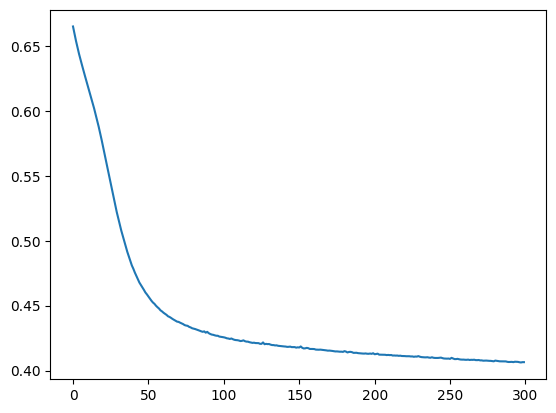

In [29]:
import matplotlib.pyplot as plt

loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()